In [1]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load your CSV file into a DataFrame
df = pd.read_csv('scores.csv')




In [3]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [4]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [5]:
df.dropna(inplace=True)  

In [6]:
df.isnull().sum()

number       0
days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
edu          0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [7]:
# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = desired_dataset_size // len(df) + 1

# # Repeat the existing data
# augmented_data = pd.concat([df] * repeats_needed, ignore_index=True)

# # If the repeated data exceeds the desired size, truncate the excess
# augmented_data = augmented_data.iloc[:desired_dataset_size]

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

In [8]:
df.head(30)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


In [9]:
label_encode=LabelEncoder()

In [10]:
labels=label_encode.fit_transform(df['age'])

In [11]:
print(labels)

[2 3 4 0 5 2 4 4 3 2 7 6 4 5 3 5 1 2 8 1]


In [12]:
df['age']=labels

In [13]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,2,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,3,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,4,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,0,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,5,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,2,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
9,condition_10,9,2,4,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
10,condition_11,14,1,4,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,3,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,2,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


# Label Encoding
{0:25-29,1:30-34,2:35-39,3:40-44,4:45-49,5:50-54,6:55-59,7:60-64,8:65-69}

In [14]:
#df.duplicated().sum()

In [15]:
#df.drop_duplicates(inplace=True)

In [16]:
df.shape

(20, 12)

In [17]:
df.drop(['number','days','edu'],axis=1,inplace=True)

In [18]:
df.head()

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,2,2.0,2.0,2.0,1.0,2.0,19.0,19.0
1,2,3,1.0,2.0,2.0,2.0,2.0,24.0,11.0
2,1,4,2.0,2.0,2.0,2.0,2.0,24.0,25.0
3,2,0,2.0,2.0,2.0,1.0,1.0,20.0,16.0
4,2,5,2.0,2.0,2.0,2.0,2.0,26.0,26.0


In [19]:
# augmented_dataset.csv

In [20]:
# # import pandas as pd

# # # Load your CSV file into a DataFrame
# # #df = pd.read_csv('scores.csv')

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = (desired_dataset_size // len(df)) + 1

# # Repeat the existing data
# augmented_data = pd.concat([df] * repeats_needed, ignore_index=True)

# # If the repeated data exceeds the desired size, truncate the excess using head
# augmented_data_truncated = augmented_data.head(desired_dataset_size)

# # Save the augmented dataset to a new CSV file
# augmented_data_truncated.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data_truncated.head())

# # View the shape of the new dataset
# print(augmented_data_truncated.shape)


In [21]:
#  augmented_data_truncated.tail(300)

In [22]:
# augmented_data_truncated.duplicated().sum()

In [23]:
# augmented_data_truncated.drop_duplicates(inplace=True)

In [24]:
# augmented_data_truncated.duplicated().sum()

In [25]:
#augmented_data_truncated.shape

In [26]:
# # import pandas as pd

# # # Load your CSV file into a DataFrame
# # #df = pd.read_csv('scores.csv')

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = (desired_dataset_size // len(df)) + 1

# # Repeat the existing data
# augmented_data = pd.concat([augmented_data_truncated] * repeats_needed, ignore_index=True)
# # Drop duplicate rows
# augmented_data = augmented_data.drop_duplicates()

# # If the repeated data exceeds the desired size, truncate the excess using head
# augmented_data_truncateds = augmented_data.head(desired_dataset_size)

# # Save the augmented dataset to a new CSV file
# augmented_data_truncateds.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data_truncateds.head())

# # View the shape of the new dataset
# print(augmented_data_truncateds.shape)

In [27]:
# augmented_data_truncateds.duplicated().sum()

In [28]:
# augmented_data_truncateds.shape

In [29]:
# import pandas as pd
# from sklearn.utils import resample

# # Load your CSV file into a DataFrame
# #dfs = pd.read_csv('scores.csv')

# # Drop rows with null values
# df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df)
# # # Drop duplicate rows
# # augmented_data = augmented_data.drop_duplicates()

# # Perform data augmentation or resampling to generate additional rows
# # For example, you can use techniques like oversampling, undersampling, or SMOTE
# # Here's an example using resampling to increase the dataset size
# resampled_data = resample(df, n_samples=additional_rows_needed)


# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df, resampled_data], ignore_index=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)


In [30]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.utils import resample

# # Load your CSV file into a DataFrame
# #df = pd.read_csv('your_dataset.csv')

# # Drop rows with null values
# #df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Shuffle the DataFrame to ensure randomness
# df_shuffled = shuffle(df)

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df_shuffled)

# # Perform resampling to generate additional rows
# # Set replace=True to allow sampling with replacement
# resampled_data = resample(df_shuffled, n_samples=additional_rows_needed, replace=True)

# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df_shuffled, resampled_data], ignore_index=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)
# print(augmented_data.duplicated().sum())


In [31]:
# augmented_data.head(400)



In [32]:
# augmented_data.duplicated().sum()

In [33]:
# augmented_data.tail(400)

In [34]:
#augmented_data.drop(['number','days','edu'],axis=1,inplace=True)

In [35]:
#augmented_data.duplicated().sum()

In [36]:

#augmented_data.drop_duplicates(inplace=True)

In [37]:
#augmented_data.duplicated().sum()

In [38]:
#augmented_data.shape

In [39]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE

# # Load your CSV file into a DataFrame
# df = pd.read_csv('scores.csv')

# # Drop rows with null values
# df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 100

# # Shuffle the DataFrame to ensure randomness
# df_shuffled = shuffle(df)

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df_shuffled)

# # Perform resampling to generate additional rows
# # Set replace=True to allow sampling with replacement
# # You may need to adjust the sampling strategy and parameters
# #smote = SMOTE(sampling_strategy='auto', random_state=42)
# resampled_data = resample(df_shuffled, n_samples=additional_rows_needed, replace=True, random_state=42)

# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df_shuffled, resampled_data], ignore_index=True)

# # Drop duplicates
# #augmented_data.drop_duplicates(inplace=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)




In [40]:
import pandas as pd
import numpy as np

# Load your CSV file into a DataFrame
#df = pd.read_csv('scores.csv')

# Drop rows with null values
df.dropna(inplace=True)

# Number of rows you want to add to your dataset
desired_dataset_size =80

# Initialize empty DataFrame for augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Perform crossover to generate additional rows
for _ in range(desired_dataset_size):
    # Select two random samples from the dataset
    sample1 = df.sample(n=1).iloc[0]
    sample2 = df.sample(n=1).iloc[0]
    
    # Perform crossover by randomly selecting features from each parent
    new_sample = pd.Series([
        sample1[col] if np.random.rand() < 0.5 else sample2[col] for col in df.columns],
        index=df.columns
    )
    
    # Add the new sample to the augmented data
    augmented_data = pd.concat([augmented_data, new_sample.to_frame().T], ignore_index=True)

# Save the augmented dataset to a new CSV file
augmented_data.to_csv('augmented_dataset.csv', index=False)

# View the first few rows of the new dataset
print(augmented_data.head())

# View the shape of the new dataset
print(augmented_data.shape)


   gender  age  afftype  melanch  inpatient  marriage  work  madrs1  madrs2
0     1.0  4.0      2.0      2.0        2.0       1.0   2.0    24.0    24.0
1     1.0  0.0      2.0      2.0        2.0       1.0   2.0    24.0    16.0
2     1.0  4.0      2.0      2.0        2.0       1.0   2.0    24.0    19.0
3     1.0  8.0      1.0      2.0        2.0       1.0   2.0    17.0    15.0
4     1.0  1.0      1.0      2.0        2.0       1.0   2.0    25.0    21.0
(80, 9)


In [41]:
augmented_data.duplicated().sum()

4

In [42]:
augmented_data.drop_duplicates(inplace=True)

In [43]:
augmented_data.duplicated().sum()

0

In [44]:
augmented_data.shape

(76, 9)

In [45]:
augmented_data.head(100)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,1.0,4.0,2.0,2.0,2.0,1.0,2.0,24.0,24.0
1,1.0,0.0,2.0,2.0,2.0,1.0,2.0,24.0,16.0
2,1.0,4.0,2.0,2.0,2.0,1.0,2.0,24.0,19.0
3,1.0,8.0,1.0,2.0,2.0,1.0,2.0,17.0,15.0
4,1.0,1.0,1.0,2.0,2.0,1.0,2.0,25.0,21.0
...,...,...,...,...,...,...,...,...,...
75,2.0,3.0,1.0,2.0,2.0,2.0,2.0,18.0,21.0
76,1.0,4.0,2.0,2.0,1.0,1.0,2.0,29.0,28.0
77,2.0,0.0,2.0,2.0,2.0,1.0,1.0,20.0,16.0
78,2.0,6.0,1.0,2.0,2.0,1.0,2.0,14.0,11.0


In [46]:
kk=augmented_data

In [47]:
kk.head(100)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,1.0,4.0,2.0,2.0,2.0,1.0,2.0,24.0,24.0
1,1.0,0.0,2.0,2.0,2.0,1.0,2.0,24.0,16.0
2,1.0,4.0,2.0,2.0,2.0,1.0,2.0,24.0,19.0
3,1.0,8.0,1.0,2.0,2.0,1.0,2.0,17.0,15.0
4,1.0,1.0,1.0,2.0,2.0,1.0,2.0,25.0,21.0
...,...,...,...,...,...,...,...,...,...
75,2.0,3.0,1.0,2.0,2.0,2.0,2.0,18.0,21.0
76,1.0,4.0,2.0,2.0,1.0,1.0,2.0,29.0,28.0
77,2.0,0.0,2.0,2.0,2.0,1.0,1.0,20.0,16.0
78,2.0,6.0,1.0,2.0,2.0,1.0,2.0,14.0,11.0


In [48]:
kk['madrs1']=kk['madrs1'].astype('int').astype('category')
kk['madrs2']=kk['madrs2'].astype('int').astype('category')
kk['gender']=kk['gender'].astype('int').astype('category')
kk['age']=kk['age'].astype('int').astype('category')
kk['afftype']=kk['afftype'].astype('int').astype('category')
kk['melanch']=kk['melanch'].astype('int').astype('category')
kk['inpatient']=kk['inpatient'].astype('int').astype('category')
kk['marriage']=kk['marriage'].astype('int').astype('category')
kk['work']=kk['work'].astype('int').astype('category')


In [49]:
kk.head(100)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,1,4,2,2,2,1,2,24,24
1,1,0,2,2,2,1,2,24,16
2,1,4,2,2,2,1,2,24,19
3,1,8,1,2,2,1,2,17,15
4,1,1,1,2,2,1,2,25,21
...,...,...,...,...,...,...,...,...,...
75,2,3,1,2,2,2,2,18,21
76,1,4,2,2,1,1,2,29,28
77,2,0,2,2,2,1,1,20,16
78,2,6,1,2,2,1,2,14,11


In [50]:
kk.reset_index(inplace=True)

In [51]:
kk.tail(100)

,index,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,0,1,4,2,2,2,1,2,24,24
1,1,1,0,2,2,2,1,2,24,16
2,2,1,4,2,2,2,1,2,24,19
3,3,1,8,1,2,2,1,2,17,15
4,4,1,1,1,2,2,1,2,25,21
...,...,...,...,...,...,...,...,...,...,...
71,75,2,3,1,2,2,2,2,18,21
72,76,1,4,2,2,1,1,2,29,28
73,77,2,0,2,2,2,1,1,20,16
74,78,2,6,1,2,2,1,2,14,11


In [52]:
kk.reset_index(drop=True,inplace=True)

In [53]:
kk.duplicated().sum()

0

In [54]:
df.isnull().sum()

gender       0
age          0
afftype      0
melanch      0
inpatient    0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [55]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      76 non-null     int64   
 1   gender     76 non-null     category
 2   age        76 non-null     category
 3   afftype    76 non-null     category
 4   melanch    76 non-null     category
 5   inpatient  76 non-null     category
 6   marriage   76 non-null     category
 7   work       76 non-null     category
 8   madrs1     76 non-null     category
 9   madrs2     76 non-null     category
dtypes: category(9), int64(1)
memory usage: 3.5 KB


In [56]:
kk.describe()

,index
count,76.000000
mean,38.763158
std,23.496308
min,0.000000
25%,18.750000
50%,38.000000
75%,59.250000
max,79.000000


In [57]:
kk.shape

(76, 10)

In [58]:
kk.head()

,index,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,0,1,4,2,2,2,1,2,24,24
1,1,1,0,2,2,2,1,2,24,16
2,2,1,4,2,2,2,1,2,24,19
3,3,1,8,1,2,2,1,2,17,15
4,4,1,1,1,2,2,1,2,25,21


In [59]:
kk.drop(columns=['index'],inplace=True)

In [60]:
kk.head()

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,1,4,2,2,2,1,2,24,24
1,1,0,2,2,2,1,2,24,16
2,1,4,2,2,2,1,2,24,19
3,1,8,1,2,2,1,2,17,15
4,1,1,1,2,2,1,2,25,21


In [61]:
kk.shape

(76, 9)

# Now i Want to Design a Machine Learning model using Classification technique to check madrs1 score and on the basis of madrs score i will predict the level of depression in the person

In [62]:
md=kk.copy()

In [63]:
md=md.drop(['madrs2'],axis=1)

In [64]:
md.head(8)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,1,4,2,2,2,1,2,24
1,1,0,2,2,2,1,2,24
2,1,4,2,2,2,1,2,24
3,1,8,1,2,2,1,2,17
4,1,1,1,2,2,1,2,25
5,2,5,2,2,2,2,2,18
6,2,4,2,2,2,1,1,24
7,2,2,1,2,2,2,2,18


In [65]:
X=md.drop(['madrs1'],axis=1)

In [66]:
Y=md['madrs1']

In [67]:
Y.value_counts()

madrs1
24    14
26    14
18    12
29     7
17     5
20     5
19     4
27     4
14     3
25     3
28     3
13     2
Name: count, dtype: int64

In [68]:
#import imblearn

In [69]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform your dataset
# X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [70]:
# X_resampled.shape, y_resampled.shape

In [71]:
# y_resampled.value_counts()

In [72]:
# X,Y=X_resampled,y_resampled

In [73]:
X.shape

(76, 7)

In [74]:
X.shape,Y.shape

((76, 7), (76,))

In [75]:
Y.shape

(76,)

In [76]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)
Xs

array([[0.   , 0.5  , 0.5  , 1.   , 1.   , 0.   , 1.   ],
       [0.   , 0.   , 0.5  , 1.   , 1.   , 0.   , 1.   ],
       [0.   , 0.5  , 0.5  , 1.   , 1.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   , 1.   , 1.   , 0.   , 1.   ],
       [0.   , 0.125, 0.   , 1.   , 1.   , 0.   , 1.   ],
       [1.   , 0.625, 0.5  , 1.   , 1.   , 1.   , 1.   ],
       [1.   , 0.5  , 0.5  , 1.   , 1.   , 0.   , 0.   ],
       [1.   , 0.25 , 0.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.625, 0.5  , 1.   , 1.   , 0.   , 1.   ],
       [0.   , 0.25 , 0.5  , 1.   , 0.   , 1.   , 1.   ],
       [0.   , 1.   , 0.5  , 1.   , 0.   , 1.   , 1.   ],
       [0.   , 0.375, 0.   , 1.   , 1.   , 0.   , 1.   ],
       [1.   , 1.   , 0.5  , 1.   , 0.   , 1.   , 1.   ],
       [1.   , 0.375, 0.   , 1.   , 1.   , 1.   , 1.   ],
       [1.   , 0.625, 0.5  , 1.   , 0.   , 1.   , 1.   ],
       [1.   , 0.375, 1.   , 1.   , 1.   , 1.   , 1.   ],
       [0.   , 0.625, 0.5  , 1.   , 1.   , 1.   , 1.   ],
       [0.   ,

In [77]:
#standardization of the features
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)
Xs

array([[-1.        ,  0.24297769,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103],
       [-1.        , -1.65100222,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103],
       [-1.        ,  0.24297769,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103],
       [-1.        ,  2.13695759, -1.45296631,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103],
       [-1.        , -1.17750724, -1.45296631,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103],
       [ 1.        ,  0.71647266,  0.4843221 ,  0.23570226,  0.47519096,
         1.20482899,  0.31851103],
       [ 1.        ,  0.24297769,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331, -3.13960871],
       [ 1.        , -0.70401227, -1.45296631,  0.23570226,  0.47519096,
         1.20482899,  0.31851103],
       [-1.        ,  0.71647266,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103],
       [-1.        , -0.7040

In [78]:
# from sklearn.preprocessing import MinMaxScaler
# scalers=MinMaxScaler()
# Xs=scalers.fit_transform(Xs)

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.28,random_state=42)

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
results=[]
names=[]
# create instances of all models
models = {
    #'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    #'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),

}

from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for training data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred,Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

Logistic Regression:
trainAccuracy: 0.5370
Support Vector Machine:
trainAccuracy: 0.5741
K-Nearest Neighbors:
trainAccuracy: 0.5000
Decision Tree:
trainAccuracy: 0.8704
Random Forest:
trainAccuracy: 0.8704
Bagging:
trainAccuracy: 0.8519
AdaBoost:
trainAccuracy: 0.3148


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 0.8704
Extra Trees:
trainAccuracy: 0.8704
TESTING ACCURACY:
Logistic Regression:
testingAccuracy: 0.3182
Support Vector Machine:
testingAccuracy: 0.1818
K-Nearest Neighbors:
testingAccuracy: 0.1818
Decision Tree:
testingAccuracy: 0.1818
Random Forest:
testingAccuracy: 0.1818
Bagging:
testingAccuracy: 0.1818
AdaBoost:
testingAccuracy: 0.0909


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
testingAccuracy: 0.1818
Extra Trees:
testingAccuracy: 0.2273


In [81]:
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score





# # Initialize K-fold cross-validation
# k_folds = 30  # Define the number of folds
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Initialize a model (e.g., Logistic Regression)
# model = DecisionTreeClassifier()

# # Initialize lists to store evaluation metrics
# accuracy_scores = []

# # Perform K-fold cross-validation
# for train_index, test_index in kf.split(Xs):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
#     # Fit the model on the training data
#     model.fit(X_train, y_train)
    
#     # Predict on the test data
#     y_pred = model.predict(X_test)
    
#     # Calculate accuracy and store the result
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)

# # Calculate the average accuracy across all folds
# avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# print("Average accuracy:", avg_accuracy)


In [82]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.pipeline import Pipeline


# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Pipeline for preprocessing and modeling
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize features
#     ('classifier', RandomForestClassifier(random_state=42))  # RandomForest classifier
# ])

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'classifier__max_depth': [None, 10, 20],       # Maximum depth of the tree
#     'classifier__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'classifier__min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# print("Best parameters:", grid_search.best_params_)

# # Evaluate the model on the training set
# y_train_pred = grid_search.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training accuracy:", train_accuracy)

# # Evaluate the model on the testing set
# y_test_pred = grid_search.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Testing accuracy:", test_accuracy)

# # Classification report on the testing set
# print("Classification report:")
# print(classification_report(y_test, y_test_pred))


In [83]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report



# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Train a classifier (e.g., RandomForest) on the resampled training data
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print classification report
# print(classification_report(y_test, y_pred))


# Here Random Forest is good in terms of training and testing accuracy

In [84]:
uubibbu

NameError: name 'uubibbu' is not defined

In [ ]:
model= RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
from sklearn import metrics
# Print the confusion matrix

metrics.confusion_matrix(Y_test, X_testing_prediction)

In [ ]:
n

# Now i want to make second model.In this model i Will take afftype as a target attribute and predict whether a person is suffering from bipolar II,unipolar depressive,bipolar I

In [95]:
md=kk.copy()

In [96]:
md=md.drop(['madrs2'],axis=1)

In [97]:
md

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,1,4,2,2,2,1,2,24
1,1,0,2,2,2,1,2,24
2,1,4,2,2,2,1,2,24
3,1,8,1,2,2,1,2,17
4,1,1,1,2,2,1,2,25
...,...,...,...,...,...,...,...,...
71,2,3,1,2,2,2,2,18
72,1,4,2,2,1,1,2,29
73,2,0,2,2,2,1,1,20
74,2,6,1,2,2,1,2,14


In [98]:
X=md.drop('afftype',axis=1)
Y=md['afftype']

In [99]:
X.shape,Y.shape

((76, 7), (76,))

In [100]:
import imblearn


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/utils/metaestimators.py)

In [101]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [102]:
X_resampled.shape, y_resampled.shape

((153, 7), (153,))

In [103]:
y_resampled.value_counts()

afftype
1    51
2    51
3    51
Name: count, dtype: int64

In [104]:
X,Y=X_resampled,y_resampled

In [105]:
X.shape,Y.shape

((153, 7), (153,))

In [106]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [107]:
Xs

array([[0.    , 0.5   , 1.    , ..., 0.    , 1.    , 0.6875],
       [0.    , 0.    , 1.    , ..., 0.    , 1.    , 0.6875],
       [0.    , 0.5   , 1.    , ..., 0.    , 1.    , 0.6875],
       ...,
       [1.    , 0.375 , 1.    , ..., 1.    , 1.    , 0.3125],
       [1.    , 0.375 , 1.    , ..., 1.    , 1.    , 0.3125],
       [1.    , 0.25  , 1.    , ..., 0.    , 1.    , 0.3125]])

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [110]:
Xs

array([[-1.37360564,  0.37640139,  0.21896394, ..., -0.89442719,
         0.23488809,  0.63377348],
       [-1.37360564, -1.77647387,  0.21896394, ..., -0.89442719,
         0.23488809,  0.63377348],
       [-1.37360564,  0.37640139,  0.21896394, ..., -0.89442719,
         0.23488809,  0.63377348],
       ...,
       [ 0.72801099, -0.16181742,  0.21896394, ...,  1.11803399,
         0.23488809, -0.74164981],
       [ 0.72801099, -0.16181742,  0.21896394, ...,  1.11803399,
         0.23488809, -0.74164981],
       [ 0.72801099, -0.70003624,  0.21896394, ..., -0.89442719,
         0.23488809, -0.74164981]])

In [111]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.2144,stratify=Y,random_state=42)

In [112]:
X.shape,X_train.shape,X_test.shape




((153, 7), (120, 7), (33, 7))

In [113]:
Y.shape,Y_train.shape,Y_test.shape

((153,), (120,), (33,))

In [114]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.7083
Logistic Regression:
trainAccuracy: 0.7250
Naive Bayes:
trainAccuracy: 0.5833
Support Vector Machine:
trainAccuracy: 0.7167
K-Nearest Neighbors:
trainAccuracy: 0.7583
Decision Tree:
trainAccuracy: 0.9167
Random Forest:
trainAccuracy: 0.9167
Bagging:
trainAccuracy: 0.9000
AdaBoost:
trainAccuracy: 0.7083
Gradient Boosting:
trainAccuracy: 0.9167
Extra Trees:
trainAccuracy: 0.9167
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.6364
Logistic Regression:
testingAccuracy: 0.6970
Naive Bayes:
testingAccuracy: 0.5758
Support Vector Machine:
testingAccuracy: 0.6364
K-Nearest Neighbors:
testingAccuracy: 0.6364
Decision Tree:
testingAccuracy: 0.7879
Random Forest:
testingAccuracy: 0.8182
Bagging:
testingAccuracy: 0.8182


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
testingAccuracy: 0.6364
Gradient Boosting:
testingAccuracy: 0.8485
Extra Trees:
testingAccuracy: 0.8485


In [116]:
#Decision Tree is good in terms of both training and testing score
modelkk=DecisionTreeClassifier()

In [117]:
modelkk.fit(X_train,Y_train)

DecisionTreeClassifier()

In [118]:
X_train_prediction=modelkk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [119]:
training_accuracy

0.9166666666666666

In [120]:
X_testing_prediction=modelkk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [121]:
testing_accuracy

0.8181818181818182

<Axes: >

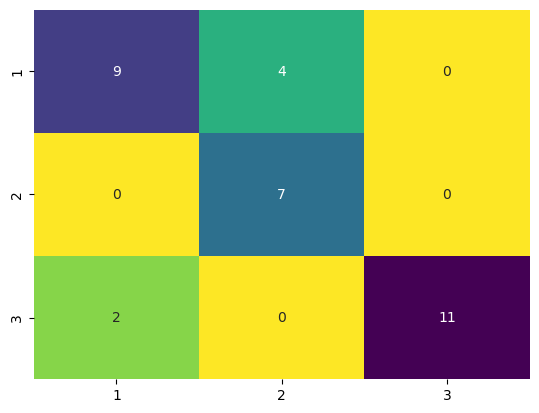

In [122]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelkk.classes_, xticklabels=modelkk.classes_)

In [123]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       1.00      0.64      0.78        11
           3       0.85      1.00      0.92        11

    accuracy                           0.82        33
   macro avg       0.85      0.82      0.81        33
weighted avg       0.85      0.82      0.81        33



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_25994/318039330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_25994/318039330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Decision Tree ')

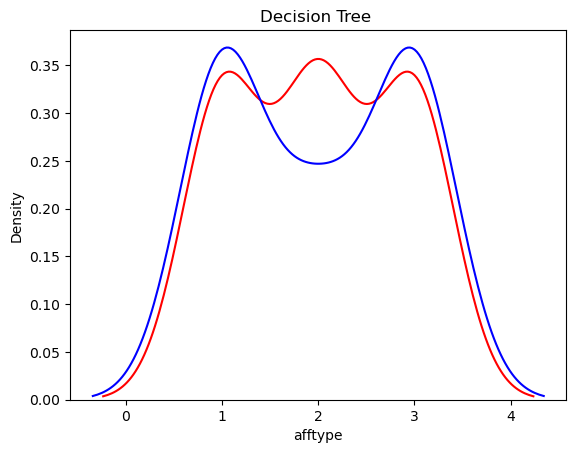

In [124]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree ')

In [126]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.loc[2]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelkk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction==1):
    print("The Person is suffering from the depression type : bipolar II")
elif(prediction==2):
    print("The Person is suffering from the depression type :unipolar depressive")
elif(prediction==3):
    print("The Person is suffering from the depression type :bipolar I")

[[0.     0.5    1.     1.     0.     1.     0.6875]]
[[-1.37360564  0.37640139  0.21896394  0.37655152 -0.89442719  0.23488809
   0.63377348]]
target: [2]
The Person is suffering from the depression type :unipolar depressive


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
X.tail(40)

In [ ]:
Y.head(300)

# Now i want to make third model.In this model i Will check whether the medical(depression) condition will improved or not after treatment.for this i will subtract madrs2-madrs1 and store in new columns name as target. except this columns all acts as features for training the model

In [127]:
jp=kk.copy()

In [128]:
jp

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,1,4,2,2,2,1,2,24,24
1,1,0,2,2,2,1,2,24,16
2,1,4,2,2,2,1,2,24,19
3,1,8,1,2,2,1,2,17,15
4,1,1,1,2,2,1,2,25,21
...,...,...,...,...,...,...,...,...,...
71,2,3,1,2,2,2,2,18,21
72,1,4,2,2,1,1,2,29,28
73,2,0,2,2,2,1,1,20,16
74,2,6,1,2,2,1,2,14,11


In [129]:
jp['madrs1']=jp['madrs1'].astype('category').astype('int')

In [130]:
jp['madrs2']=jp['madrs2'].astype('category').astype('int')

In [131]:
jp['result']=jp['madrs2'] - jp['madrs1']

In [132]:
jp.head(40)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,result
0,1,4,2,2,2,1,2,24,24,0
1,1,0,2,2,2,1,2,24,16,-8
2,1,4,2,2,2,1,2,24,19,-5
3,1,8,1,2,2,1,2,17,15,-2
4,1,1,1,2,2,1,2,25,21,-4
5,2,5,2,2,2,2,2,18,26,8
6,2,4,2,2,2,1,1,24,24,0
7,2,2,1,2,2,2,2,18,13,-5
8,1,5,2,2,2,1,2,17,15,-2
9,1,2,2,2,1,2,2,18,21,3


In [133]:
jp['madrs2']=jp['madrs2'].astype('int').astype('category')

In [134]:
jp['madrs1']=jp['madrs1'].astype('int').astype('category')

In [135]:
jp['result']=jp['result'].astype('int').astype('category')

In [136]:
jp

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,result
0,1,4,2,2,2,1,2,24,24,0
1,1,0,2,2,2,1,2,24,16,-8
2,1,4,2,2,2,1,2,24,19,-5
3,1,8,1,2,2,1,2,17,15,-2
4,1,1,1,2,2,1,2,25,21,-4
...,...,...,...,...,...,...,...,...,...,...
71,2,3,1,2,2,2,2,18,21,3
72,1,4,2,2,1,1,2,29,28,-1
73,2,0,2,2,2,1,1,20,16,-4
74,2,6,1,2,2,1,2,14,11,-3


In [137]:
X=jp.drop(['result'],axis=1)

In [138]:
Y=jp['result']

In [139]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [140]:
Xs

array([[0.        , 0.5       , 0.5       , 1.        , 1.        ,
        0.        , 1.        , 0.6875    , 0.76470588],
       [0.        , 0.        , 0.5       , 1.        , 1.        ,
        0.        , 1.        , 0.6875    , 0.29411765],
       [0.        , 0.5       , 0.5       , 1.        , 1.        ,
        0.        , 1.        , 0.6875    , 0.47058824],
       [0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 1.        , 0.25      , 0.23529412],
       [0.        , 0.125     , 0.        , 1.        , 1.        ,
        0.        , 1.        , 0.75      , 0.58823529],
       [1.        , 0.625     , 0.5       , 1.        , 1.        ,
        1.        , 1.        , 0.3125    , 0.88235294],
       [1.        , 0.5       , 0.5       , 1.        , 1.        ,
        0.        , 0.        , 0.6875    , 0.76470588],
       [1.        , 0.25      , 0.        , 1.        , 1.        ,
        1.        , 1.        , 0.3125    , 0.11764706],


In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [143]:
Xs

array([[-1.        ,  0.24297769,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103,  0.31649293,  0.90266641],
       [-1.        , -1.65100222,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103,  0.31649293, -0.69274399],
       [-1.        ,  0.24297769,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103,  0.31649293, -0.09446509],
       [-1.        ,  2.13695759, -1.45296631,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103, -1.22822486, -0.89217029],
       [-1.        , -1.17750724, -1.45296631,  0.23570226,  0.47519096,
        -0.82999331,  0.31851103,  0.5371669 ,  0.30438751],
       [ 1.        ,  0.71647266,  0.4843221 ,  0.23570226,  0.47519096,
         1.20482899,  0.31851103, -1.00755089,  1.30151901],
       [ 1.        ,  0.24297769,  0.4843221 ,  0.23570226,  0.47519096,
        -0.82999331, -3.13960871,  0.31649293,  0.90266641],
       [ 1.        , -0.70401227, -1.45296631,  0.23570226,  0

In [151]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.229,random_state=42)

In [152]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.5517
Logistic Regression:
trainAccuracy: 0.5862
Naive Bayes:
trainAccuracy: 0.4828
Support Vector Machine:
trainAccuracy: 0.4655
K-Nearest Neighbors:
trainAccuracy: 0.3793
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9655
AdaBoost:
trainAccuracy: 0.2586


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 1.0000
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.2778
Logistic Regression:
testingAccuracy: 0.3333
Naive Bayes:
testingAccuracy: 0.1111
Support Vector Machine:
testingAccuracy: 0.2222
K-Nearest Neighbors:
testingAccuracy: 0.2222
Decision Tree:
testingAccuracy: 0.4444
Random Forest:
testingAccuracy: 0.3889
Bagging:
testingAccuracy: 0.3333
AdaBoost:
testingAccuracy: 0.2222


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
testingAccuracy: 0.3889
Extra Trees:
testingAccuracy: 0.1667


# Here Decision Tree is good in terms of training and testing accuracy

In [146]:
#Decision Tree is good in terms of both training and testing score
models=DecisionTreeClassifier()

In [ ]:
models.fit(X_train,Y_train)

In [ ]:
X_train_prediction=models.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=models.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[399]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=model.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction <0):
    print("Patient Medical(depression) Condition has been improved after treatment ")
elif(prediction>0):
    print("Patient Medical(depression) Condition  become drastic  after treatment   ")
elif(prediction==0):
    print("Patient medical(depression) condition is neither be improved nor become drastic")

In [ ]:
X.head(15)

In [ ]:
Y.head(400)

# Now i want too design fourth machine learning model in which i will take melanch as target attributes and rest of the columns as features for training the machine learning model.

In [ ]:
jp=jp.drop('result',axis=1)

In [ ]:
jp.shape

In [ ]:
jp.groupby('melanch').size()

In [ ]:
X=jp.drop('melanch',axis=1)
Y=jp['melanch']

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.27,random_state=72)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

# I will take Random forest for model training

In [ ]:
modelss= RandomForestClassifier()

In [ ]:
modelss.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelss.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelss.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelss.classes_, xticklabels=modelss.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[95]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelss.predict(std_data)#model=Random Forest Tree
print("target:",prediction)
if(prediction ==1):
    print("person is suffering from melancholia ")
elif(prediction==2):
    print("person is not suffering from melancholia  ")

In [ ]:
X.head(15)

In [ ]:
Y.head(100)

# Now i want to design 5th machine learning model.in this model i will take work as target attributes and other features as trainingattributes for machine learning model

In [ ]:
jp.groupby('work').size()

In [ ]:
jp.groupby('work').count()

In [ ]:
X=jp.drop('work',axis=1)
Y=jp['work']

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)


In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.26,random_state=72)

In [ ]:
X.shape,X_train.shape,X_test.shape

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

# I will take Decsion Tree  for model training

In [ ]:
modelpk= DecisionTreeClassifier()

In [ ]:
modelpk.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelpk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelpk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelpk.classes_, xticklabels=modelpk.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[14]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelpk.predict(std_data)#model=Random Forest Tree
print("target:",prediction)
if(prediction ==1):
    print("working or studying ")
elif(prediction==2):
    print("unemployed/sick leave/pension)  ")

In [ ]:
X.head(15)

In [ ]:
Y.head(15)

# Now i want to design sixth machine learning model.in this model i will take marriage as target attributes and rest as training attributes for machine learning model

In [ ]:
 jp.groupby('marriage').size()

In [ ]:
X=jp.drop('marriage',axis=1)
Y=jp['marriage']

In [ ]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform your dataset
# X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
# X,Y=X_resampled,y_resampled

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
Xs

In [ ]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
Xs

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.28,random_state=42,stratify=Y)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

In [ ]:
modelsk= DecisionTreeClassifier()


In [ ]:
modelsk.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelsk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
training_accuracy

In [ ]:
X_testing_prediction=modelsk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy


In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelsk.classes_, xticklabels=modelsk.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision TRee ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[7]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelsk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction ==1):
    print(" married or cohabiting ")
elif(prediction==2):
    print("Single  ")

In [ ]:
X,Y

# Now i want to design seventh machine learning model.in this model i will take inpatient as target attributes and rest as training attributes for machine learning model

In [ ]:
jp.groupby('inpatient').size()

In [ ]:
jp.groupby('inpatient').count()

In [ ]:
X=jp.drop('inpatient',axis=1)
Y=jp['inpatient']

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
X,Y=X_resampled,y_resampled

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.28,random_state=42,stratify=Y)

In [ ]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

In [ ]:
modelak= DecisionTreeClassifier()

In [ ]:
modelak.fit(X_train,Y_train)

In [ ]:
X_train_prediction=modelak.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:

training_accuracy

In [ ]:
X_testing_prediction=modelak.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [ ]:
testing_accuracy

In [ ]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelak.classes_, xticklabels=modelak.classes_)

In [ ]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

In [ ]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision TRee ')

In [ ]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[19]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelak.predict(std_data)#model=Decision  Tree
print("target:",prediction)
if(prediction ==1):
    print(" Inpatient ")
elif(prediction==2):
    print("Outpatient  ")

In [ ]:
Y.head(20)

In [ ]:
X